# Prediction of Credit Card fraud
- The [creditcard.csv](https://kh3-ls-storage.s3.us-east-1.amazonaws.com/Updated%20Project%20guide%20data%20set/creditcard.csv) contains a reasonable large number of data related with credic card transactions.

## Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.




## Recommended Steps
1. **Exploratory Data Analysis:** Analyze and understand the data to identify patterns, relationships, and trends in the data by using Descriptive Statistics and Visualizations. 
1. **Data Cleaning:** This might include standardization, handling the missing values and outliers in the data.
1. **Dealing with Imbalanced data:** This data set is highly imbalanced. The data should be balanced using the appropriate  methods before moving onto model building.
1. **Feature Engineering:** Create new features or transform the existing features for better performance of the ML Models. 
1. **Model Selection:** Choose the most appropriate model that can be used for this project. 
1. **Model training:** Split the data into train & test sets and use the train set to estimate the best model parameters. 
1. **Model Validation:** Evaluate the performance of the model on data that was not used during the training process. The goal is to estimate the model's ability to generalize to new, unseen data and to identify any issues with the model, such as overfitting.
1. **Model Deployment:** Model deployment is the process of making a trained machine learning model available for use in a production environment. 


In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [164]:
# loading the dataset
data = pd.read_csv("https://kh3-ls-storage.s3.us-east-1.amazonaws.com/Updated%20Project%20guide%20data%20set/creditcard.csv")
# first 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data exploration and cleaning

In [165]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [166]:
# checking the missing values in each column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [167]:
# checking for fraudulent transactions
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [168]:
# separating the data for analysis
legit = data[data.Class == 0]
fraud = data[data.Class == 1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [169]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [170]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [171]:
# compare the values for both transactions
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [172]:
# utilities for plotting data
def countplot_data(data, feature):
    '''
        Method to compute countplot of given dataframe
        Parameters:
            data(pd.Dataframe): Input Dataframe
            feature(str): Feature in Dataframe
    '''
    plt.figure(figsize=(10,10))
    sns.countplot(x=feature, data=data)
    plt.show()

def pairplot_data_grid(data, feature1, feature2, target):
    '''
        Method to construct pairplot of the given feature wrt data
        Parameters:
            data(pd.DataFrame): Input Dataframe
            feature1(str): First Feature for Pair Plot
            feature2(str): Second Feature for Pair Plot
            target: Target or Label (y)
    '''

    sns.FacetGrid(data, hue=target).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()


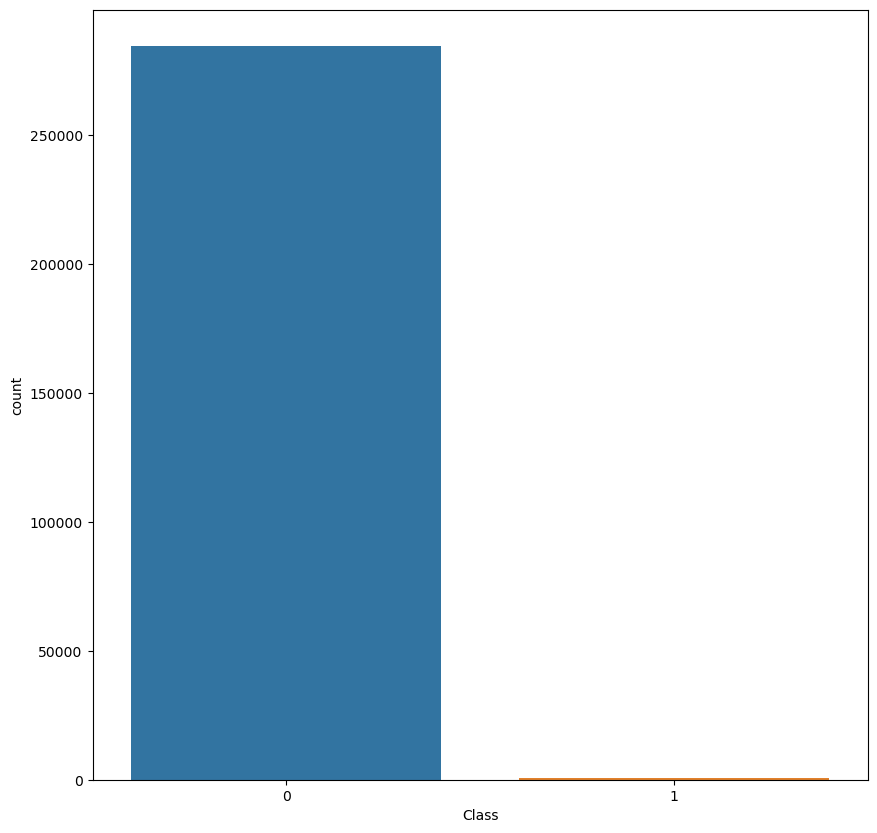

In [173]:
# unbalanced data with legitimate and fraudulent data as count plot
countplot_data(data, data.Class)

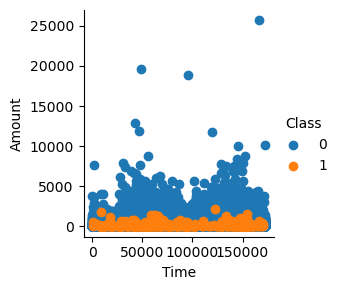

In [174]:
# relationship between fraud transactions and amount of money
pairplot_data_grid(data, "Time", "Amount", "Class")

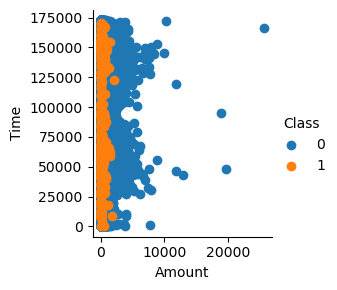

In [175]:
pairplot_data_grid(data, "Amount", "Time", "Class")

* The Data does not have any missing values and hence, need not be handled.
* The Data has only Target Variable Class as the categorical variable.
* Remaining Features are numerical and need to be only standardized for comparison after balancing the dataset
* The mean of the amount of money in transactions is 88.34
* The standard deviation of amount of money in transactions is 250.12
* The time is distributed throughout the data equitably and hence, serves as an independent feature
* It is best to not remove or drop any data or features in this case and try to tune the model assuming them as independent features initially
* The Dataset has 31 columns with unknown features labelled V1 to V28, Time, Amount and Class
* The target variable is 'Class' and rest of the variables are input features
* The Class has the following values:
  0: Legitimate Transactions
  1: Fraud Transactions
* It can be observed that the fraud transactions are generally not above an amount of 2500.
* It can also be observed that the fraud transactions are evenly distributed about time.
* The Dataset is highly imbalanced as evident from the countplot with majoritarian class label '0' and minority class label '1'. Thus, if we run the model on such imbalanced data we may end up highly overfitting it on the data and resulting in non-deployable model. Hence, we will perform Synthetic Minority Oversampling on the data to balance it out as shown later after exploring other features.

In [176]:
# Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
legit_sample = legit.sample(n=492)
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
87408,61674.0,1.175464,-0.207412,1.130632,0.665067,-0.875796,0.206954,-0.753863,0.251648,0.716198,...,-0.067888,-0.027160,-0.014207,0.042001,0.266692,0.320851,0.013024,0.012253,1.94,0
218992,141551.0,2.287804,-0.596634,-1.757361,-1.170007,0.136674,-0.556089,-0.268966,-0.380078,-0.729338,...,0.396290,1.206090,-0.089671,0.134978,0.375195,0.073525,-0.034984,-0.062598,15.00,0
80957,58735.0,-3.314928,-2.984825,0.916308,-0.948370,1.810882,-1.330976,-1.491131,0.875191,-1.598434,...,0.644281,0.505317,-0.286193,-0.232554,0.600674,-0.136332,-0.051825,-0.521684,50.00,0
30964,36156.0,1.295712,0.271130,0.314291,0.499473,-0.195799,-0.696756,0.083251,-0.200471,0.007887,...,-0.284781,-0.797589,0.069250,-0.107037,0.299867,0.123912,-0.026631,0.014978,1.79,0
162259,114968.0,1.841357,-0.544824,-0.301692,0.403789,-0.788328,-0.717143,-0.335490,-0.170293,0.928977,...,-0.154560,-0.464457,0.339302,0.073006,-0.635255,0.258801,-0.043419,-0.026096,90.00,0


In [177]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [178]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93845.130081,-0.231761,-0.017296,-0.007106,-0.051681,-0.036262,-0.048506,-0.036959,0.003817,0.060338,...,0.002928,-0.025555,-0.072839,0.017866,0.009543,0.019696,0.007208,0.033355,-0.019686,96.233862
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Feature engineering

In [179]:
# Split data into feature and target
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

print(X)

            Time        V1        V2        V3        V4        V5        V6  \
87408    61674.0  1.175464 -0.207412  1.130632  0.665067 -0.875796  0.206954   
218992  141551.0  2.287804 -0.596634 -1.757361 -1.170007  0.136674 -0.556089   
80957    58735.0 -3.314928 -2.984825  0.916308 -0.948370  1.810882 -1.330976   
30964    36156.0  1.295712  0.271130  0.314291  0.499473 -0.195799 -0.696756   
162259  114968.0  1.841357 -0.544824 -0.301692  0.403789 -0.788328 -0.717143   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [180]:
print(Y)

87408     0
218992    0
80957     0
30964     0
162259    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [181]:
# Split data into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [182]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


We will use **Logistic regression** model for training and prediction.

# Training models

In [183]:
model = LogisticRegression()

In [184]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Validation

In [185]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [186]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9479034307496823


In [187]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [188]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9390862944162437
